## Project Overview
The goal is to properly assemble, clean, and manage a set of raw data files about residential real estate properties.Once they are integrated and cleansed data set, use two types of supervised predictive algorithms I.E linear regression and k-Nearest-Neighbor to estimate the sales price of a list of one-hundred (100) houses in the sample dataset.

## DataSet OverView
There are four Raw data files containing information from an anonymous United States city assessor’s office that is located in the North West region. The values in the data files are individual residential real estate properties sold in the city over a time period of 4 years. 

The four Raw Data File Names are as follows:

1)Property_Survey1

2)Property_Survey2

3)House_Feature

4)Quality Assessment

**Score_Data Dataset** contains 100 rows for which the Sale Price is to be predicted using the model developed.

## Overview of Main Stages of Project

**Step 0**:Import Necessary Packages, Define Utilities

**Step 1**:Import Dataset, Understand Basic Info About Properties in each DataFrame & Merge DataFrames

**Step 2**:Deep EDAs, Confirm Assumptions & Generate Leads

**Step 3**:Build Models Type-01 Regression Algorithm

**Step 4**:Build Models Type-02 KNN Algorithm

**Step 5**:Model Evaluation

**Step 6**:Deployment - Import, Understand & Prepare Score Data Set

**Step 7**: Predict Target of Score Data Set

**Step 8**: Prepare & Export Required DataFrame



**Step 0. Import Necessary Packages, Define Utilities**

In [2]:
import pandas as pd
import numpy as np
from numpy import NaN as NA
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
import sklearn.linear_model as lm
import sklearn.neighbors as knn

In [3]:
# interactive plot
%matplotlib notebook

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [5]:
# this makes sure the results of random processes are the same
np.random.seed(1)

**Step 1. Import Dataset, Understand Basic Info About Properties in each DataFrame & Merge DataFrames**

In [6]:
#Read the 4 Raw Dataset
House_Feature=pd.read_csv('House_Feature.csv')
Quality_Assessment=pd.read_csv('Quality_Assessment.csv')
Property_Survey_1=pd.read_csv('Property_Survey_1.csv')
Property_Survey_2=pd.read_csv('Property_Survey_2.csv')

In [5]:
#peek at the first 3 rows of dataset:
House_Feature.head(3)

,PID,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,...,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice
0,526301100,1960,1960,112,1,639,441,0,1656,0,...,1,3,7,2,3,2,528,210,62,215000
1,526350040,1961,1961,0,1,468,270,1,896,0,...,1,2,5,0,3,1,730,140,0,105000
2,526351010,1958,1958,108,1,923,406,1,1329,0,...,1,3,6,0,3,1,312,393,36,172000


In [6]:
#peek at the first 3 rows of dataset:
Quality_Assessment.head(3)

,PID,OverallQuality,OverallCondition
0,526301100,6,5
1,526350040,5,6
2,526351010,6,6


In [7]:
#peek at the first 3 rows of dataset:
Property_Survey_1.head(3)

,PID,LotArea,LotShape,BldgTp
0,526301100,31770,0,1
1,526350040,11622,1,1
2,526351010,14267,0,1


In [8]:
#peek at the first 3 rows of dataset:
Property_Survey_2.head(3)

,PID,LotArea,LotShape,BldgTp
0,903430060,5520,1,1
1,903451090,6876,1,1
2,903458170,6240,1,1


In [9]:
#Check for the shape of DataSets 
print("House Feature shape :{}".format(House_Feature.shape))
print("Quality Assessment shape :{}".format(Quality_Assessment.shape))
print("Property Survey 1 shape :{}".format(Property_Survey_1.shape))
print("Property Survey 2 shape :{}".format(Property_Survey_2.shape))

House Feature shape :(2370, 23)
Quality Assessment shape :(2370, 3)
Property Survey 1 shape :(600, 4)
Property Survey 2 shape :(1770, 4)


In [10]:
#check for dtypes
print("House Feature Data Type : \n {}".format(House_Feature.dtypes))
print("   ")
print("Quality Assessment Data Type : \n {}".format(Quality_Assessment.dtypes))
print("   ")
print("Property Survey 1 Data Type : \n {}".format(Property_Survey_1.dtypes))
print("   ")
print("Property Survey 2 Data Type : \n {}".format(Property_Survey_2.dtypes))

House Feature Data Type : 
 PID               int64
YearBuilt         int64
YearRemodel       int64
VeneerExterior    int64
BsmtFinTp         int64
BsmtFinSqft       int64
BsmtUnfinSqft     int64
HeatingQC         int64
FstFlrSqft        int64
SecFlrSqft        int64
AbvGrndLiving     int64
FullBathBsmt      int64
HalfBathHouse     int64
FullBathHouse     int64
BdrmAbvGrnd       int64
RmAbvGrnd         int64
Fireplaces        int64
GarageTp          int64
GarageCars        int64
GarageArea        int64
WdDckSqft         int64
OpenPrchSqft      int64
SalePrice         int64
dtype: object
   
Quality Assessment Data Type : 
 PID                 int64
OverallQuality      int64
OverallCondition    int64
dtype: object
   
Property Survey 1 Data Type : 
 PID         int64
LotArea     int64
LotShape    int64
BldgTp      int64
dtype: object
   
Property Survey 2 Data Type : 
 PID         int64
LotArea     int64
LotShape    int64
BldgTp      int64
dtype: object


In [11]:
#check for Missing values
print("House Feature Null Value :{}".format(House_Feature.isnull().sum().sum()))
print("Quality Assessment Null Value :{}".format(Quality_Assessment.isnull().sum().sum()))
print("Property Survey 1 Null Value :{}".format(Property_Survey_1.isnull().sum().sum()))
print("Property Survey 2 Null Value :{}".format(Property_Survey_2.isnull().sum().sum()))

House Feature Null Value :0
Quality Assessment Null Value :0
Property Survey 1 Null Value :0
Property Survey 2 Null Value :0


In [12]:
# check statistics about all numeric columns
House_Feature.describe()

,PID,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,...,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice
count,2.370000e+03,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,...,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000
mean,7.153307e+08,1970.570886,1984.086920,88.143882,0.704641,429.805907,557.101688,2.153586,1116.442616,325.198734,...,1.508017,2.816456,6.258650,0.589451,2.232911,1.718987,457.978903,91.650633,46.002532,173730.772574
std,1.886401e+08,30.109415,20.694221,158.718586,0.456300,408.779757,410.685375,0.944222,344.282409,406.198426,...,0.501727,0.742817,1.392625,0.630429,1.010171,0.708998,197.608559,120.616635,64.245617,64080.843305
min,5.263011e+08,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,5.313690e+08,1953.000000,1965.000000,0.000000,0.000000,0.000000,239.250000,1.000000,864.000000,0.000000,...,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,312.000000,0.000000,0.000000,129900.000000
50%,5.354551e+08,1972.000000,1993.000000,0.000000,1.000000,378.000000,470.000000,3.000000,1056.000000,0.000000,...,2.000000,3.000000,6.000000,1.000000,3.000000,2.000000,463.000000,0.000000,25.000000,159000.000000
75%,9.071351e+08,1999.000000,2003.000000,144.000000,1.000000,715.500000,792.000000,3.000000,1331.500000,688.750000,...,2.000000,3.000000,7.000000,1.000000,3.000000,2.000000,572.000000,168.000000,68.000000,207000.000000
max,1.007100e+09,2010.000000,2010.000000,1600.000000,1.000000,2085.000000,2140.000000,3.000000,2898.000000,1721.000000,...,2.000000,6.000000,12.000000,4.000000,3.000000,5.000000,1488.000000,736.000000,547.000000,475000.000000


In [13]:
# check statistics about all numeric columns
Quality_Assessment.describe()

,PID,OverallQuality,OverallCondition
count,2.370000e+03,2370.000000,2370.000000
mean,7.153307e+08,6.050633,5.630380
std,1.886401e+08,1.252423,1.095717
min,5.263011e+08,2.000000,1.000000
25%,5.313690e+08,5.000000,5.000000
50%,5.354551e+08,6.000000,5.000000
75%,9.071351e+08,7.000000,6.000000
max,1.007100e+09,10.000000,9.000000


In [14]:
# check statistics about all numeric columns
Property_Survey_1.describe()

,PID,LotArea,LotShape,BldgTp
count,6.000000e+02,600.000000,600.000000,600.000000
mean,6.514299e+08,9403.418333,0.663333,0.858333
std,1.755711e+08,4636.681113,0.472964,0.348999
min,5.263011e+08,1476.000000,0.000000,0.000000
25%,5.282936e+08,7205.250000,0.000000,1.000000
50%,5.344021e+08,9343.500000,1.000000,1.000000
75%,9.024025e+08,10995.500000,1.000000,1.000000
max,9.241520e+08,57200.000000,1.000000,1.000000


In [15]:
# check statistics about all numeric columns
Property_Survey_2.describe()

,PID,LotArea,LotShape,BldgTp
count,1.770000e+03,1770.000000,1770.000000,1770.000000
mean,7.369920e+08,9801.694915,0.636723,0.883616
std,1.880492e+08,6587.298945,0.481080,0.320776
min,5.263020e+08,1300.000000,0.000000,0.000000
25%,5.323596e+08,7200.000000,0.000000,1.000000
50%,9.023296e+08,9305.500000,1.000000,1.000000
75%,9.072550e+08,11268.750000,1.000000,1.000000
max,1.007100e+09,159000.000000,1.000000,1.000000


Append the two Property Survey Datasets since their columns are similar and also check for duplicate values

In [16]:
#Append the two property Surveys Tables
Property_Survey_Append=Property_Survey_1.append(Property_Survey_2,ignore_index=True)
Property_Survey = Property_Survey_Append.drop_duplicates('PID', keep='first')

In [17]:
#check for null values after appending the Property Survey Datasets
print("Property Survey Null value :{}".format(Property_Survey.isnull().sum().sum()))

Property Survey Null value :0


**Step 2. Deep EDAs**

For binary variables and Nominal values
suffices to generate value counts table

In [19]:
House_Feature['BsmtFinTp'].value_counts().sort_index()

0     700
1    1670
Name: BsmtFinTp, dtype: int64

In [20]:
Property_Survey['LotShape'].value_counts().sort_index()

0     845
1    1525
Name: LotShape, dtype: int64

In [21]:
Property_Survey['BldgTp'].value_counts().sort_index()

0     291
1    2079
Name: BldgTp, dtype: int64

In [22]:
House_Feature['HalfBathHouse'].value_counts().sort_index()

0    1488
1     882
Name: HalfBathHouse, dtype: int64

<IPython.core.display.Javascript object>


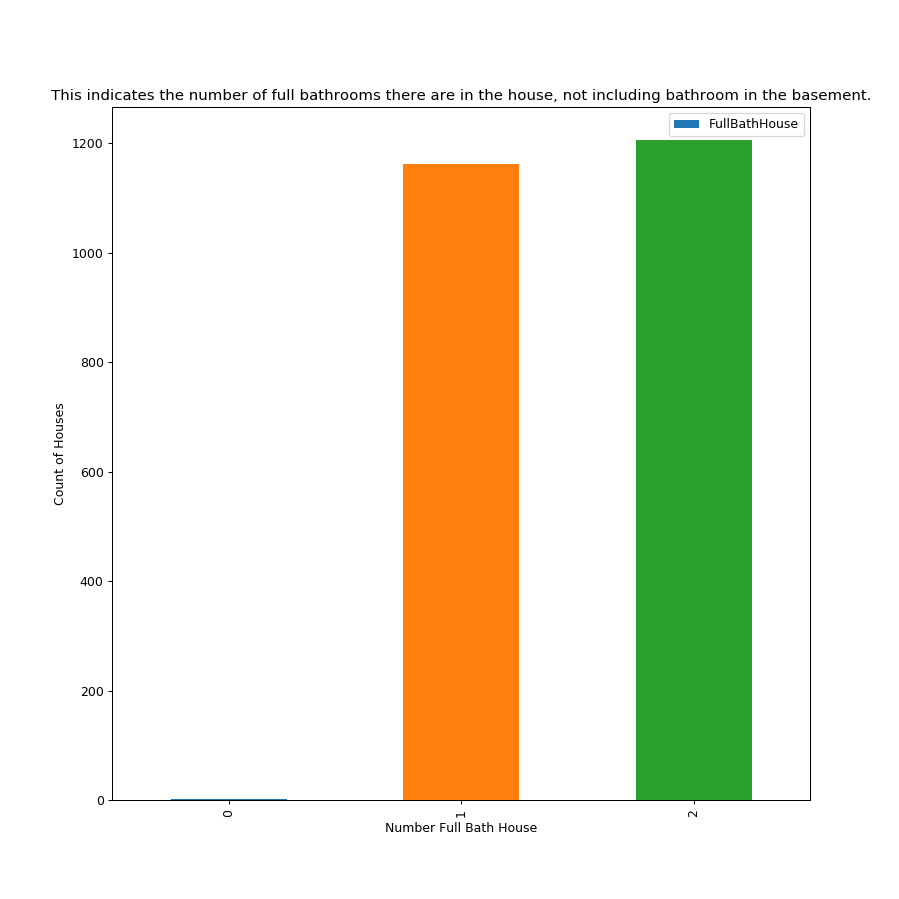

In [24]:
FullBathHouse= House_Feature['FullBathHouse'].value_counts().sort_index()
FullBathHousefig = plt.figure(figsize=(10, 10))
FullBathHouse = FullBathHouse.plot.bar()
FullBathHouse.set_xlabel('Number Full Bath House')
FullBathHouse.set_ylabel('Count of Houses')
FullBathHouse.set_title('This indicates the number of full bathrooms there are in the house, not including bathroom in the basement.')
FullBathHouse.legend()


**If the house neither have FullBath nor HalfBath the data can be Erroneous data but basement isn't included when collecting the Data so deleting such data may not be a good option and might lose other features important informations**

**If the house has no bedroom can be Erroneous data but basement isn't included when collecting the Data so deleting such data may not be a good option and might lose other features important informations and also it could be case of studio apartment**

<IPython.core.display.Javascript object>


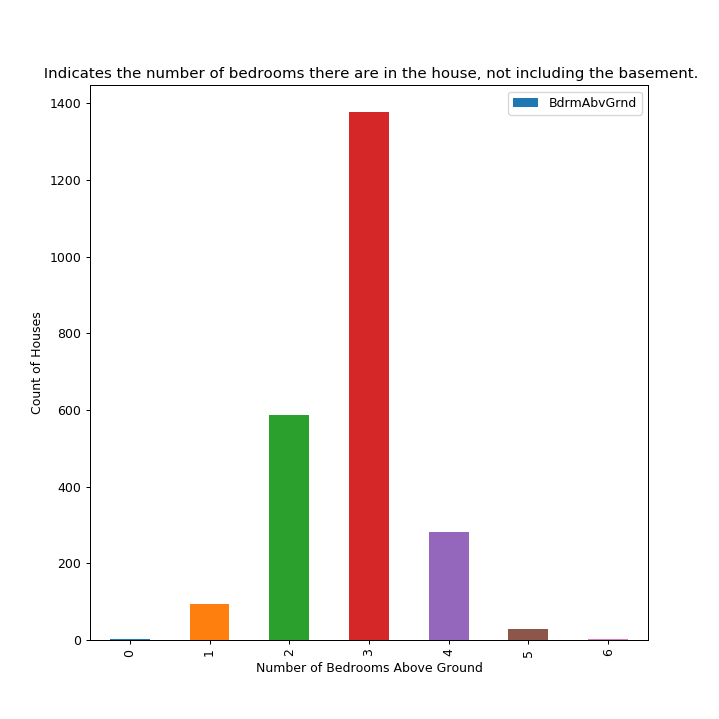

In [33]:
BdrmAbvGrnd= House_Feature['BdrmAbvGrnd'].value_counts().sort_index()
BdrmAbvGrndfig = plt.figure(figsize=(8, 8))
BdrmAbvGrndGrnd = BdrmAbvGrnd.plot.bar()
BdrmAbvGrndGrnd.set_xlabel('Number of Bedrooms Above Ground')
BdrmAbvGrndGrnd.set_ylabel('Count of Houses')
BdrmAbvGrndGrnd.set_title(' Indicates the number of bedrooms there are in the house, not including the basement.')
BdrmAbvGrndGrnd.legend()

<IPython.core.display.Javascript object>


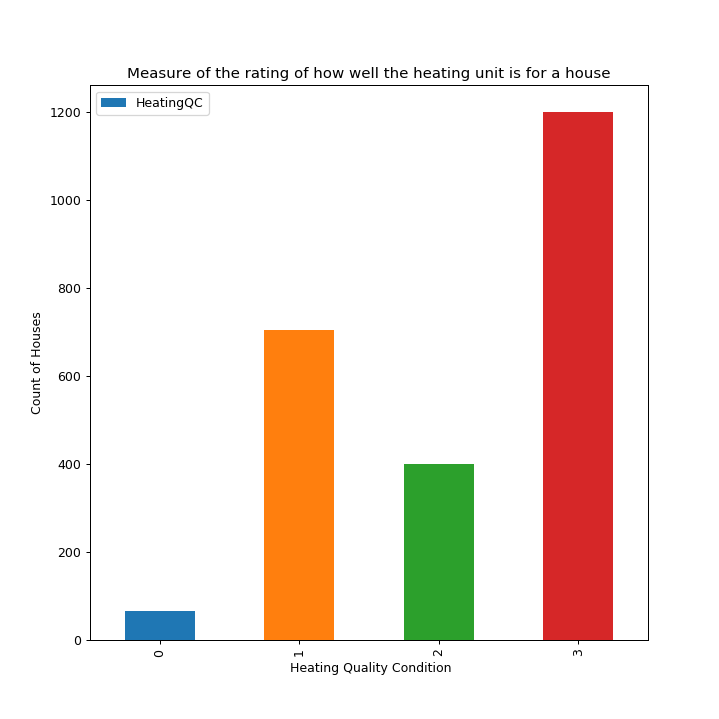

In [34]:
HeatingQC = House_Feature['HeatingQC'].value_counts().sort_index()
HeatingQCfig = plt.figure(figsize=(8, 8))
HeatingQC = HeatingQC.plot.bar()
HeatingQC.set_xlabel(' Heating Quality Condition')
HeatingQC.set_ylabel('Count of Houses')
HeatingQC.set_title('Measure of the rating of how well the heating unit is for a house')
HeatingQC.legend()

**HeatingQC** (i.e., Heating Quality Condition) – This is a measure of the rating of how well the
heating unit is for a house. The rating scale is as follows:

3 - Excellent

2 - Good

1 - Average

0 - Fair

<IPython.core.display.Javascript object>


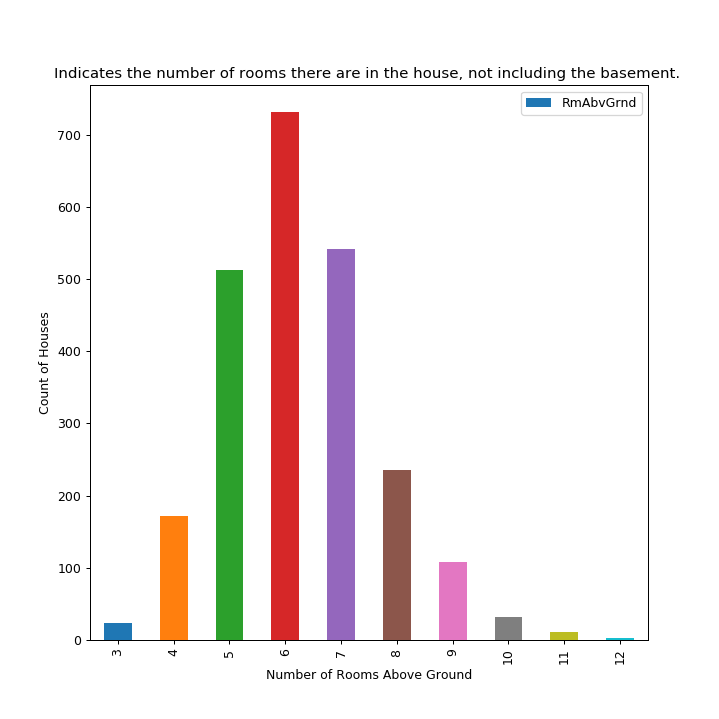

In [38]:
#This indicates the number of rooms there are in the house, not including the basement. 
RmAbvGrnd= House_Feature['RmAbvGrnd'].value_counts().sort_index()
RmAbvGrndfig = plt.figure(figsize=(8, 8))
pltRmAbvGrnd = RmAbvGrnd.plot.bar()
pltRmAbvGrnd.set_xlabel('Number of Rooms Above Ground')
pltRmAbvGrnd.set_ylabel('Count of Houses')
pltRmAbvGrnd.set_title('Indicates the number of rooms there are in the house, not including the basement. ')
pltRmAbvGrnd.legend()

<IPython.core.display.Javascript object>


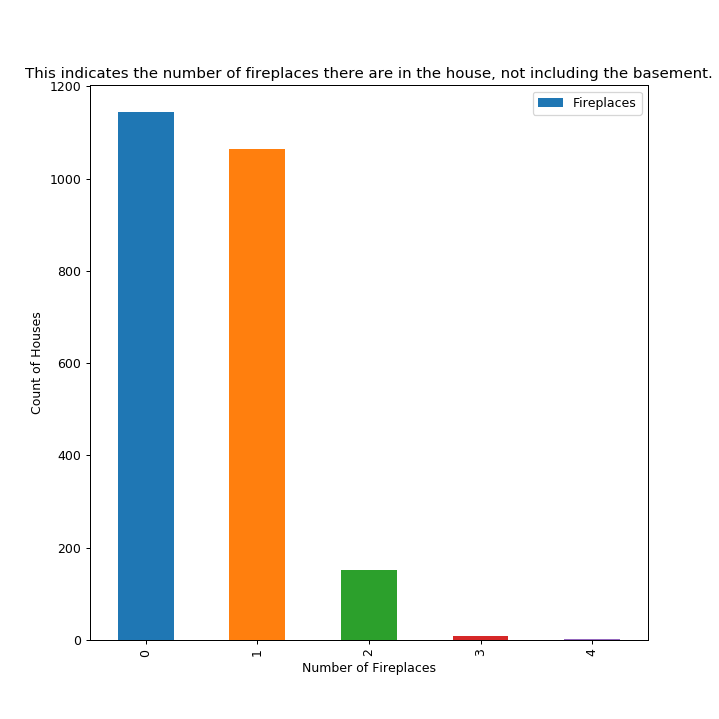

In [39]:
#This indicates the number of fireplaces there are in the house, not including the basement. 
Fireplaces= House_Feature['Fireplaces'].value_counts().sort_index()
Fireplacesfig = plt.figure(figsize=(8, 8))
pltFireplaces = Fireplaces.plot.bar()
pltFireplaces.set_xlabel('Number of Fireplaces')
pltFireplaces.set_ylabel('Count of Houses')
pltFireplaces.set_title('This indicates the number of fireplaces there are in the house, not including the basement.')
pltFireplaces.legend()

**GarageTp** (i.e., Garage Type) – Whether there is a garage of a given type is described and indicated as follows:

3 - Attached to house

2 - Built-In (Garage part of house - typically has room above garage)

1 - Detached from home

0 - No garage

<IPython.core.display.Javascript object>


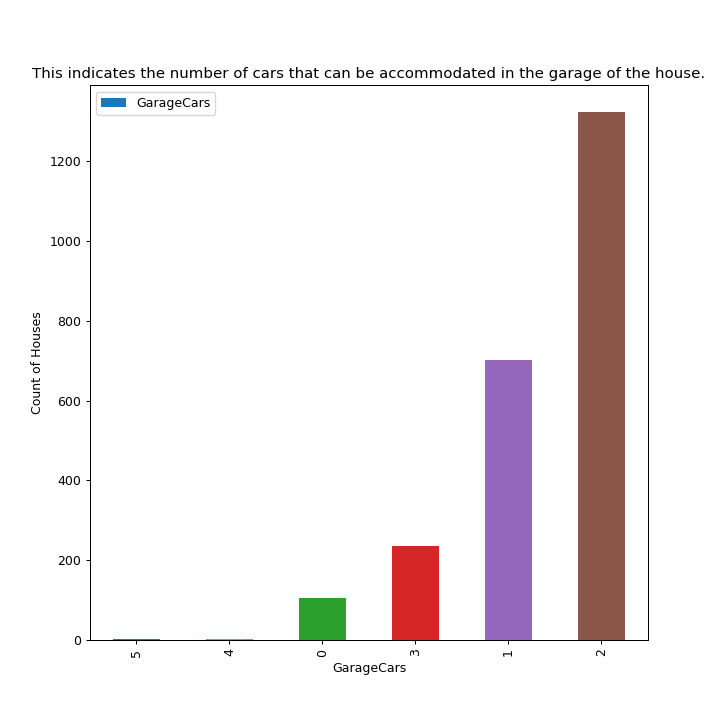

In [40]:
House_Feature['GarageCars'].value_counts().sort_values()
GarageCars= House_Feature['GarageCars'].value_counts().sort_values()
GarageCarsfig = plt.figure(figsize=(8, 8))
pltGarageCars = GarageCars.plot.bar()
pltGarageCars.set_xlabel('GarageCars')
pltGarageCars.set_ylabel('Count of Houses')
pltGarageCars.set_title('This indicates the number of cars that can be accommodated in the garage of the house.')
pltGarageCars.legend()

<IPython.core.display.Javascript object>


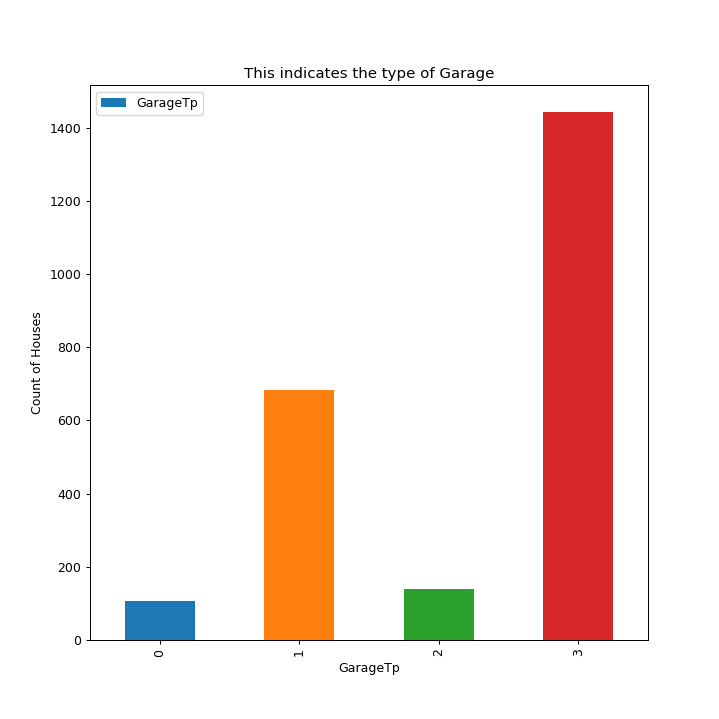

In [41]:
GarageTp= House_Feature['GarageTp'].value_counts().sort_index()
GarageTpfig = plt.figure(figsize=(8, 8))
pltGarageTp = GarageTp.plot.bar()
pltGarageTp.set_xlabel('GarageTp')
pltGarageTp.set_ylabel('Count of Houses')
pltGarageTp.set_title('This indicates the type of Garage')
pltGarageTp.legend()

<IPython.core.display.Javascript object>


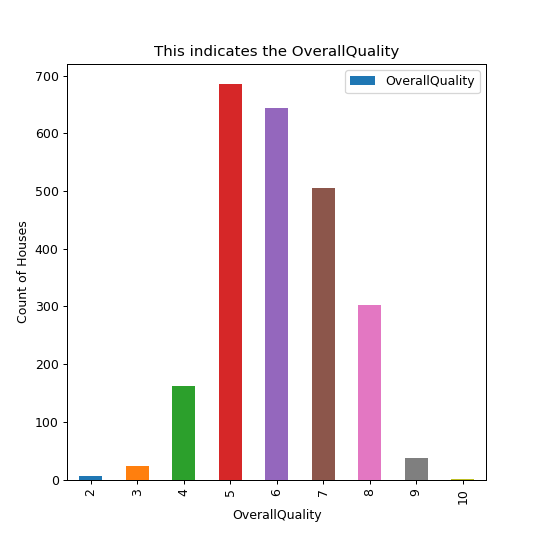

In [42]:
OverallQuality= Quality_Assessment['OverallQuality'].value_counts().sort_index()
OverallQualityfig = plt.figure(figsize=(6, 6))
pltOverallQuality = OverallQuality.plot.bar()
pltOverallQuality.set_xlabel('OverallQuality')
pltOverallQuality.set_ylabel('Count of Houses')
pltOverallQuality.set_title('This indicates the OverallQuality')
pltOverallQuality.legend()


**OverallQuality** – This is a rating of the overall material and finish of the house. The numeric scale of this rating is as follows.

**10** - Very Excellent

**9**- Excellent

**8**- Very Good

**7**-Good

**6** - Above Average

**5** - Average

**4** - Below Average

**3**- Fair

**2** - Poor

**1** - Very Poor

<IPython.core.display.Javascript object>


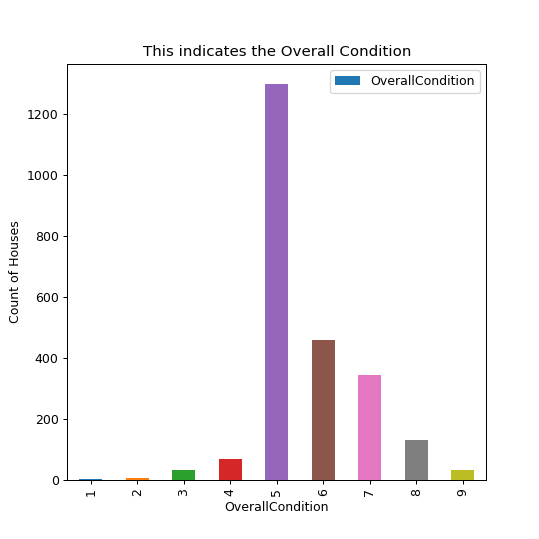

In [32]:
OverallCondition= Quality_Assessment['OverallCondition'].value_counts().sort_index()
OverallConditionfig = plt.figure(figsize=(6, 6))
pltOverallCondition = OverallCondition.plot.bar()
pltOverallCondition.set_xlabel('OverallCondition')
pltOverallCondition.set_ylabel('Count of Houses')
pltOverallCondition.set_title('This indicates the Overall Condition')
pltOverallCondition.legend()

**OverallCondition**: This is a rating of the overall condition of the house. The numeric scale of this rating is as follows

**10** - Very Excellent

**9**- Excellent

**8**- Very Good

**7**-Good

**6** - Above Average

**5** - Average

**4** - Below Average

**3**- Fair

**2** - Poor

**1** - Very Poor

Check for correlation between the House_Feature values

In [33]:
dfHouse_Feature=House_Feature[['YearBuilt','YearRemodel','VeneerExterior','BsmtFinTp','BsmtFinSqft','BsmtUnfinSqft','HeatingQC','FstFlrSqft','SecFlrSqft','AbvGrndLiving','FullBathBsmt','HalfBathHouse','FullBathHouse','BdrmAbvGrnd','RmAbvGrnd','Fireplaces','GarageTp','GarageCars','GarageArea','WdDckSqft','OpenPrchSqft','SalePrice']]
dfHouse_Feature.corr()


,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,AbvGrndLiving,...,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice
YearBuilt,1.000000,0.592891,0.277729,0.133977,0.246858,0.121896,0.435485,0.305742,0.028533,0.248082,...,0.525114,-0.050273,0.115821,0.148427,0.544127,0.546707,0.482846,0.226747,0.216065,0.585731
YearRemodel,0.592891,1.000000,0.138039,-0.061026,0.076375,0.163324,0.517051,0.220909,0.155815,0.306065,...,0.495482,-0.014779,0.208204,0.083043,0.267956,0.409280,0.348186,0.198621,0.229312,0.525906
VeneerExterior,0.277729,0.138039,1.000000,0.114318,0.220944,0.044521,0.133432,0.303536,0.113385,0.332229,...,0.237590,0.107721,0.214808,0.229848,0.228365,0.315848,0.307945,0.120585,0.102535,0.415283
BsmtFinTp,0.133977,-0.061026,0.114318,1.000000,0.680872,-0.596296,-0.086697,0.153707,-0.194873,-0.065909,...,-0.080000,-0.100230,-0.134812,0.119763,0.204253,0.036914,0.077142,0.096963,-0.018852,0.116483
BsmtFinSqft,0.246858,0.076375,0.220944,0.680872,1.000000,-0.581040,0.027391,0.402694,-0.203622,0.118312,...,0.068709,-0.108579,-0.021538,0.253205,0.299605,0.213129,0.256428,0.195898,0.071901,0.384289
BsmtUnfinSqft,0.121896,0.163324,0.044521,-0.596296,-0.581040,1.000000,0.195086,0.289950,-0.019750,0.211021,...,0.254172,0.130727,0.228299,-0.002260,0.050486,0.181349,0.152591,-0.073316,0.107748,0.158441
HeatingQC,0.435485,0.517051,0.133432,-0.086697,0.027391,0.195086,1.000000,0.173391,0.173745,0.288213,...,0.379653,0.031181,0.206045,0.083280,0.177562,0.328696,0.285335,0.095389,0.189586,0.438989
FstFlrSqft,0.305742,0.220909,0.303536,0.153707,0.402694,0.289950,0.173391,1.000000,-0.310932,0.487889,...,0.350441,0.078585,0.311950,0.393509,0.431562,0.429535,0.462136,0.210884,0.176674,0.629534
SecFlrSqft,0.028533,0.155815,0.113385,-0.194873,-0.203622,-0.019750,0.173745,-0.310932,1.000000,0.672012,...,0.367335,0.511306,0.603976,0.151626,-0.074120,0.177825,0.117512,0.056845,0.197060,0.284066
AbvGrndLiving,0.248082,0.306065,0.332229,-0.065909,0.118312,0.211021,0.288213,0.487889,0.672012,1.000000,...,0.605287,0.534008,0.802214,0.442172,0.253668,0.489970,0.461594,0.213775,0.316335,0.741919


Check for correlation between the Property_Survey values

In [34]:
dfCorr = Property_Survey[['LotArea', 'LotShape', 'BldgTp']]
dfCorr.corr()

,LotArea,LotShape,BldgTp
LotArea,1.000000,-0.245026,0.354803
LotShape,-0.245026,1.000000,-0.063758
BldgTp,0.354803,-0.063758,1.000000


Check for correlation between the Quality Assessment values

In [35]:
dfCorr_Quality = Quality_Assessment[['OverallQuality', 'OverallCondition']]
dfCorr_Quality.corr()

,OverallQuality,OverallCondition
OverallQuality,1.000000,-0.150922
OverallCondition,-0.150922,1.000000


**No significant results observed from the Dataset correlation results**

In [44]:
#Merge the 3 Datasets before building the model
House_Prediction = pd.merge(pd.merge(Property_Survey,Quality_Assessment, on='PID', how='inner', validate='1:1'),House_Feature ,on='PID', how='inner', validate='1:1' ) 


In [45]:
#Check for missing values after merge
#Sanity Check
House_Prediction.isnull().sum().sum()

0

In [46]:
#Check shape after merge
House_Prediction.shape


(2370, 28)

List of interval variables to prepare (z-standardization):

- VeneerExterior
- BsmtFinSqft
- BsmtUnfinSqft
- FstFlrSqft
- SecFlrSqft
- AbvGrndLiving
- GarageArea
- OpenPrchSqft
- LotArea


In [50]:
#Step 1 z-standardize for few Interval Variables
House_Prediction_colnames_to_be_z = ['VeneerExterior', 'BsmtFinSqft', 'BsmtUnfinSqft', 'FstFlrSqft','SecFlrSqft','AbvGrndLiving','GarageArea','OpenPrchSqft','LotArea']
z_means = House_Prediction[House_Prediction_colnames_to_be_z].mean(axis=0)
print(z_means, '\n')
z_sds = House_Prediction[House_Prediction_colnames_to_be_z].std(axis=0)
print(z_sds)

VeneerExterior      88.143882
BsmtFinSqft        429.805907
BsmtUnfinSqft      557.101688
FstFlrSqft        1116.442616
SecFlrSqft         325.198734
AbvGrndLiving     1446.174262
GarageArea         457.978903
OpenPrchSqft        46.002532
LotArea           9700.865401
dtype: float64 

VeneerExterior     158.718586
BsmtFinSqft        408.779757
BsmtUnfinSqft      410.685375
FstFlrSqft         344.282409
SecFlrSqft         406.198426
AbvGrndLiving      445.597554
GarageArea         197.608559
OpenPrchSqft        64.245617
LotArea           6153.729681
dtype: float64


In [51]:
# Step 2: manually center and re-scale (that is, "z-standardize")
House_Prediction_Zinterval = (House_Prediction[House_Prediction_colnames_to_be_z] - z_means) / z_sds

In [52]:
#Step 3 Add Suffix
House_Prediction_Zinterval = House_Prediction_Zinterval.add_suffix('_z')


In [53]:
#Sanity Check
print('Manual z-standardize result is:',(House_Prediction['BsmtUnfinSqft'].iloc[0] - z_means['BsmtUnfinSqft']) / z_sds['BsmtUnfinSqft'])
print('Broadcast z-standardize result is:',House_Prediction_Zinterval.iloc[0, 2])

Manual z-standardize result is: -0.2827022700191405
Broadcast z-standardize result is: -0.2827022700191405


In [54]:
#Compare results and print the correctness 
print('Result is correct!')

Result is correct!


In [55]:
#Assign PID as index for Z std DataFrame Developed
House_Prediction_Zinterval.index=House_Prediction['PID']


In [56]:
#peek at the first 5 rows:
House_Prediction_Zinterval.head(5)

,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,GarageArea_z,OpenPrchSqft_z,LotArea_z
PID,,,,,,,,,
526301100,0.150305,0.511753,-0.282702,1.567194,-0.800591,0.470886,0.354342,0.249005,3.586302
526350040,-0.555347,0.093434,-0.699079,-0.640296,-0.800591,-1.234689,1.376565,-0.716042,0.312190
526351010,0.125103,1.206503,-0.367926,0.617393,-0.800591,-0.262960,-0.738728,-0.155692,0.742011
526353030,-0.555347,1.553879,1.188010,2.885879,-0.800591,1.489743,0.323979,-0.716042,0.237114
527105010,-0.555347,0.883591,-1.022928,-0.547349,0.925167,0.410293,0.121559,-0.186823,0.670997


**Analyse YearBuilt and YearRemodel using Graph**

From the Graph it is clear that yearBuilt is more spreaded than YearRemodel

<IPython.core.display.Javascript object>


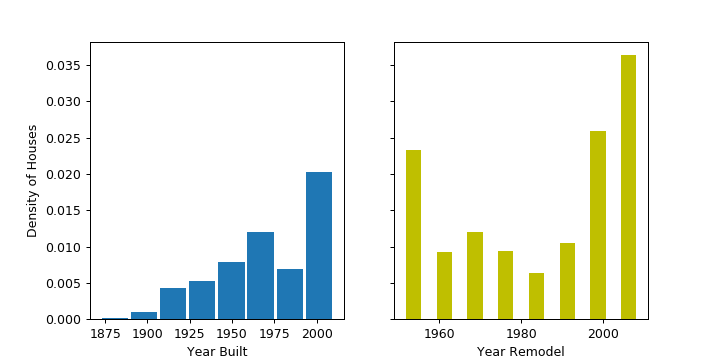

Text(0.5, 0, 'Year Remodel')

In [87]:
fig1, axes1 = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
ax1_0, ax1_1 = axes1
ax1_0.hist(x=House_Feature['YearBuilt'], density=True, bins=8, rwidth=0.9)
ax1_1.hist(x=House_Feature['YearRemodel'], density=True, bins=8, rwidth=0.5, color='y')
ax1_0.set_ylabel('Density of Houses')
ax1_0.set_xlabel('Year Built')
ax1_1.set_xlabel('Year Remodel')

**Preparing Summary to select least informative Feature from the Dataset.**

In [57]:
House_Prediction1 = House_Prediction.copy()
del House_Prediction1['SalePrice'] , House_Prediction1['PID'] 
yData = House_Prediction['SalePrice']
XData = House_Prediction1
XData = sm.add_constant(XData)
House_Prediction_Model1 = sm.OLS(yData, XData).fit()
House_Prediction_Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     676.5
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:16:11   Log-Likelihood:                -27056.
No. Observations:                2370   AIC:                         5.417e+04
Df Residuals:                    2343   BIC:                         5.432e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.233e+06   6.89e+04    -17.891      0.000   -1.37e+06    -1.1e+06
LotArea              0.6421      0.086      7.429      0.000       0.473       0.812
LotShape         -2913.1281   1041.270     -2.798      0.005   -4955.035    -871.221
BldgTp             1.23e+04   1734.556      7.092      0.000    8900.783    1.57e+04
OverallQuality    1.307e+04    596.798     21.897      0.000    1.19e+04    1.42e+04
OverallCondition  4747.8443    515.682      9.207      0.000    3736.603    5759.086
YearBuilt          435.9356     30.940     14.090      0.000     375.262     496.609
YearRemodel        155.0676     33.567      4.620      0.000      89.243     220.892
VeneerExterior      17.9060      3.220      5.560      0.000      11.591      24.221
BsmtFinTp        -1420.4984   1511.428     -0.940      0.347   -4384.374    1543.378
BsmtFinSqft         26.7026      2.278     11.724      0.000      22.236      31.169
BsmtUnfinSqft        8.8831      2.203      4.033      0.000       4.563      13.203
HeatingQC         3255.8412    591.332      5.506      0.000    2096.252    4415.430
FstFlrSqft          35.6899     10.272      3.475      0.001      15.547      55.833
SecFlrSqft          23.3826     10.102      2.315      0.021       3.572      43.193
AbvGrndLiving       32.8082     10.106      3.246      0.001      12.991      52.625
FullBathBsmt      5323.1360   1236.809      4.304      0.000    2897.781    7748.491
HalfBathHouse    -1248.0753   1417.884     -0.880      0.379   -4028.514    1532.363
FullBathHouse    -5182.9532   1483.986     -3.493      0.000   -8093.016   -2272.890
BdrmAbvGrnd      -7276.5011    939.936     -7.741      0.000   -9119.693   -5433.309
RmAbvGrnd         1625.3948    648.956      2.505      0.012     352.808    2897.982
Fireplaces        4364.1837    878.680      4.967      0.000    2641.113    6087.254
GarageTp         -1835.0018    594.287     -3.088      0.002   -3000.385    -669.619
GarageCars        2150.6035   1512.159      1.422      0.155    -814.706    5115.913
GarageArea          27.6734      5.143      5.381      0.000      17.588      37.759
WdDckSqft            7.0095      4.064      1.725      0.085      -0.959      14.978
OpenPrchSqft        24.6126      7.664      3.212      0.001       9.584      39.641
==============================================================================
Omnibus:                      304.480   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.982
Skew:                           0.505   Prob(JB):                         0.00
Kurtosis:                       6.808   Cond. No.                     1.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

Informative attribute is such an input variable that tests significantly after a t-test, using t and P>|t|)

t-test result has a p-value of

- BsmtFinTp 
- GarageCars 
- HalfBathHouse 
- WdDckSqft

Greater than 0.05

So these columns may not produce significant results

<IPython.core.display.Javascript object>


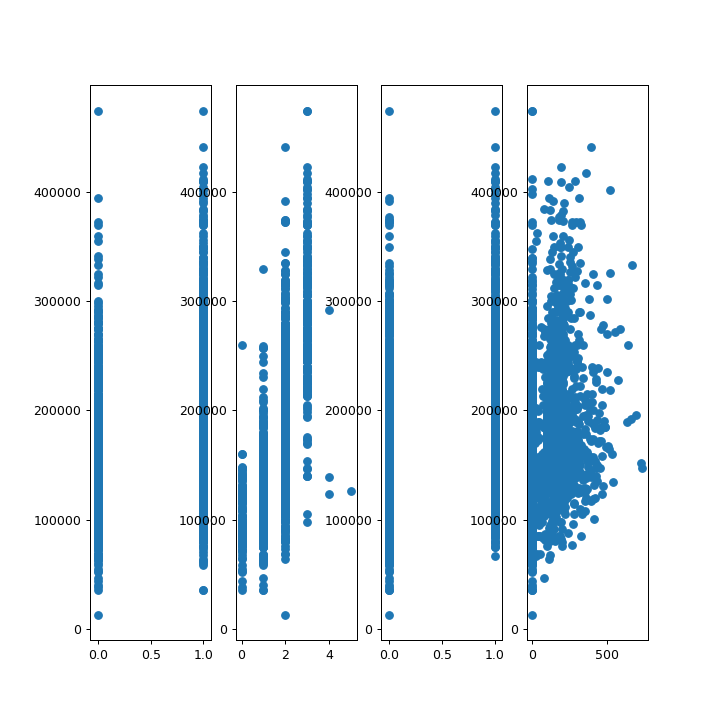

In [58]:
#Check for outliners
#Outliners can cause Skew data

House_Prediction_scat = plt.figure(figsize=(8, 8))
ax1 = House_Prediction_scat.add_subplot(1, 4, 1)
ax1.scatter(House_Prediction['BsmtFinTp'], House_Prediction['SalePrice'])
ax2 = House_Prediction_scat.add_subplot(1, 4, 2)
ax2.scatter(House_Prediction['GarageCars'], House_Prediction['SalePrice'])
ax3 = House_Prediction_scat.add_subplot(1, 4, 3)
ax3.scatter(House_Prediction['HalfBathHouse'], House_Prediction['SalePrice'])
ax4 = House_Prediction_scat.add_subplot(1, 4, 4)
ax4.scatter(House_Prediction['WdDckSqft'], House_Prediction['SalePrice'])

In [59]:
#Remove the 4 featues which are least informative from the dataset
House_Prediction.drop(columns=['BsmtFinTp','GarageCars','HalfBathHouse','WdDckSqft'],inplace=True)


In [60]:
#Display the final columns selected
House_Prediction.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'FullBathHouse', 'BdrmAbvGrnd',
       'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageArea', 'OpenPrchSqft',
       'SalePrice'],
      dtype='object')

**Step 3:Build Models Type-01 Regression Algorithm**

Linear regression model

In [62]:
#Assign SalePrice as YData
yData=House_Prediction['SalePrice']

In [67]:
#Preparing X data for model
House_Prediction_Withoutzvalues=House_Prediction.drop(columns=['VeneerExterior', 'BsmtFinSqft', 'BsmtUnfinSqft', 'FstFlrSqft','SecFlrSqft','AbvGrndLiving','GarageArea','OpenPrchSqft','LotArea','SalePrice'])
House_Prediction_Withoutzvalues.index=House_Prediction['PID']

In [ ]:
#Preparing X data for model
House_Prediction_Withoutzvalues.drop(columns=['PID'],inplace=True)

In [70]:
#Preparing X data for model
XDataReg=pd.merge(House_Prediction_Zinterval,House_Prediction_Withoutzvalues, on='PID', how='inner', validate='1:1')


c:\users\rashm\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3267: FutureWarning: 'PID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [71]:
#Preparing X data for model
XDataReg.index=House_Prediction['PID']

In [72]:
#Preparing X data for model
XDataReg.drop(columns=['PID'], inplace=True)

In [73]:
#check for null values after merge
print(XDataReg.isnull().sum().sum())

0


In [74]:
#check Shape
XDataReg.shape

(2370, 22)

In [78]:
# first, define a linear regression instance
regRFE = lm.LinearRegression()

In [81]:
# second, define an RFE which retains 20 most significant inputs
rfe_20 = RFE(regRFE, n_features_to_select=20)

In [82]:
# third, fit this rfe
rfe_20.fit(X=XDataReg, y=yData)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=20, step=1, verbose=0)

In [83]:
# get the names of the retained columns
XDataReg.columns[rfe_20.get_support()]

Index(['VeneerExterior_z', 'BsmtFinSqft_z', 'BsmtUnfinSqft_z', 'FstFlrSqft_z',
       'SecFlrSqft_z', 'AbvGrndLiving_z', 'GarageArea_z', 'OpenPrchSqft_z',
       'LotArea_z', 'LotShape', 'BldgTp', 'OverallQuality', 'OverallCondition',
       'HeatingQC', 'FullBathBsmt', 'FullBathHouse', 'BdrmAbvGrnd',
       'RmAbvGrnd', 'Fireplaces', 'GarageTp'],
      dtype='object')

**Loop them to avoid manual work**

In [85]:
# fit 11 times each with a different n_features_to_select value -- result stored in 12 columns
df_retained_bool = pd.DataFrame()
for i in range(1, 22, 2):
    rfe_temp = RFE(regRFE, n_features_to_select=i)
    rfe_temp.fit(X=XDataReg, y=yData)
    df_retained_bool['retained_' + str(i)] = rfe_temp.get_support()

df_retained_bool.shape, df_retained_bool.sum()

((22, 11), retained_1      1
 retained_3      3
 retained_5      5
 retained_7      7
 retained_9      9
 retained_11    11
 retained_13    13
 retained_15    15
 retained_17    17
 retained_19    19
 retained_21    21
 dtype: int64)

In [90]:
# using the 12 iterations of selected features, calculate their x-valid scores for each
regression = lm.LinearRegression()
df_xvalid_reg = pd.DataFrame()
for label, content in df_retained_bool.iteritems():
    selected_labels_list = XDataReg.columns[content.values]
    df_xvalid_reg[label] = cross_val_score(regression, X=XDataReg[selected_labels_list], y=yData, cv=10, 
                                           scoring='neg_mean_squared_error')

df_xvalid_reg.shape

(10, 11)

**After Z-standardisation few values are negative so "neg_mean_squared_error" is a better choice since Mean Squared Logarithmic Error cannot be used when targets contain negative values**

**Add one more x-valid result: the full model**

In [91]:
df_xvalid_reg['retained_22'] = cross_val_score(regression, X=XDataReg, y=yData, cv=10, scoring='neg_mean_squared_error')

In [92]:
xvalid_mean_regression = df_xvalid_reg.mean()
xvalid_mean_regression

retained_1    -1.616695e+09
retained_3    -8.946298e+08
retained_5    -6.916491e+08
retained_7    -6.373805e+08
retained_9    -6.227974e+08
retained_11   -6.191535e+08
retained_13   -6.049128e+08
retained_15   -5.943610e+08
retained_17   -5.912006e+08
retained_19   -5.873400e+08
retained_21   -5.119499e+08
retained_22   -5.085053e+08
dtype: float64

**Step 5:Model Evaluation**

<IPython.core.display.Javascript object>


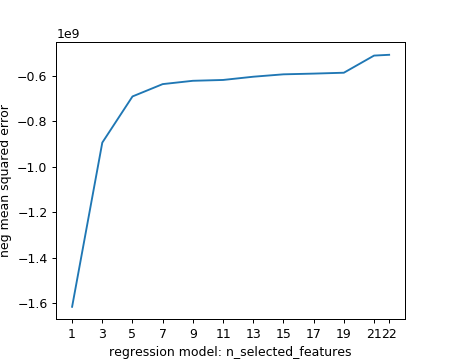

In [93]:
# Plot a graph to analyse the model with various features
newfig = plt.figure(figsize=(5,4))
s_numbering = pd.Series(xvalid_mean_regression.index).apply(lambda x:x[9:]).astype(np.int)
xvalid_mean_regression.index = s_numbering
figXvalReg = xvalid_mean_regression.plot.line()

In [95]:
#Add Labels
figXvalReg.set_xlabel('regression model: n_selected_features')
figXvalReg.set_ylabel('neg mean squared error')
figXvalReg.set_xticks(s_numbering)

Regression model with 22 selected features has the highest x-valid score (i.e., largest "neg_mean_squared_error" measure). 

**Conclusion**: model "retained_22" is the best x-valid performance model of regression models

To be precise, sort the results:

In [96]:
#Recheck out Conclusion
xvalid_mean_regression.sort_values(ascending=False)

22   -5.085053e+08
21   -5.119499e+08
19   -5.873400e+08
17   -5.912006e+08
15   -5.943610e+08
13   -6.049128e+08
11   -6.191535e+08
9    -6.227974e+08
7    -6.373805e+08
5    -6.916491e+08
3    -8.946298e+08
1    -1.616695e+09
dtype: float64

**Step-04: Model Type-02 Development**

kNN (LWA) model with distance-weighted voting

In [97]:
df_xvalid_knnlwa = pd.DataFrame()
for i in range(2,16):
    # define a kNN instance
    knnlwa_temp = knn.KNeighborsRegressor(n_neighbors=i, weights='distance')
    df_xvalid_knnlwa['k_' + str(i)] = cross_val_score(knnlwa_temp, X=XDataReg, y=yData, cv=10, 
                                                      scoring='neg_mean_squared_error')

df_xvalid_knnlwa.shape

(10, 14)

In [99]:
#Calcuate the mean
xvalid_mean_knnlwa = df_xvalid_knnlwa.mean()
xvalid_mean_knnlwa

k_2    -9.299232e+08
k_3    -8.928820e+08
k_4    -8.624070e+08
k_5    -8.586671e+08
k_6    -8.609845e+08
k_7    -8.577544e+08
k_8    -8.630998e+08
k_9    -8.735953e+08
k_10   -8.862864e+08
k_11   -9.023309e+08
k_12   -9.063688e+08
k_13   -9.191983e+08
k_14   -9.268538e+08
k_15   -9.331955e+08
dtype: float64

<IPython.core.display.Javascript object>


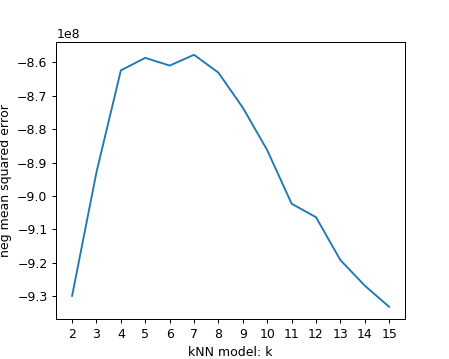

In [100]:
#Plot the results for Analysis
newfig = plt.figure(figsize=(5,4))
s_numbering = pd.Series(xvalid_mean_knnlwa.index).apply(lambda x:x[2:]).astype(np.int)
xvalid_mean_knnlwa.index = s_numbering
figXvalKnn = xvalid_mean_knnlwa.plot.line()

In [101]:
#Add Labels
figXvalKnn.set_xlabel('kNN model: k')
figXvalKnn.set_ylabel('neg mean squared error')
figXvalKnn.set_xticks(s_numbering)

In [102]:
#Recheck our results
xvalid_mean_knnlwa.sort_values(ascending=False)

7    -8.577544e+08
5    -8.586671e+08
6    -8.609845e+08
4    -8.624070e+08
8    -8.630998e+08
9    -8.735953e+08
10   -8.862864e+08
3    -8.928820e+08
11   -9.023309e+08
12   -9.063688e+08
13   -9.191983e+08
14   -9.268538e+08
2    -9.299232e+08
15   -9.331955e+08
dtype: float64

**Clearly Regression is a better choice compared to KNN**

**Step 6:Deployment - Import, Understand & Prepare Score Data Set**

In [103]:
#Read the DataSet
Score_Data=pd.read_csv('Score_Data-No_Sale_Price.csv')

In [104]:
#Sneek the DataSet
Score_Data.head(10)

,PID,LotArea,LotShape,BldgTp,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,...,HalfBathHouse,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft
0,528445060,8987,1,1,8,5,2005,2006,226.0,0,...,0,2,2.0,6.0,1,3,3,880,144,0
1,528456160,9215,1,1,7,5,2009,2010,0.0,0,...,0,2,2.0,4.0,0,3,2,676,0,136
2,528458070,8640,1,1,7,5,2009,2009,0.0,1,...,1,2,3.0,7.0,0,3,2,614,169,45
3,906380190,6762,1,1,7,5,2006,2006,24.0,1,...,0,2,2.0,6.0,0,3,2,632,105,61
4,906385010,10402,0,1,7,5,2009,2009,0.0,0,...,0,2,3.0,6.0,0,3,3,740,0,36
5,906385020,7360,1,1,7,5,2010,2010,80.0,1,...,0,2,2.0,6.0,0,3,2,615,0,54
6,528235010,7795,0,1,7,5,2004,2005,0.0,1,...,1,2,NaN,6.0,1,3,2,432,100,51
7,528235090,8068,0,1,6,5,2002,2002,0.0,0,...,1,2,4.0,8.0,1,2,2,390,120,46
8,528240150,10125,0,1,7,5,2004,2004,0.0,0,...,1,20,3.0,7.0,1,3,2,434,300,48
9,528250020,8965,0,1,7,5,2003,2003,0.0,1,...,1,2,3.0,8.0,1,3,2,400,0,75


In [105]:
#Change the Index
Score_Data.index=Score_Data['PID']

In [110]:
# Know the columns Names
Score_Data.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft',
       'SecFlrSqft', 'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp',
       'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft'],
      dtype='object')

In [106]:
#check for shape of the Dataset
Score_Data.shape

(100, 27)

In [107]:
#Understand the Dtypes
Score_Data.dtypes

PID                   int64
LotArea               int64
LotShape              int64
BldgTp                int64
OverallQuality        int64
OverallCondition      int64
YearBuilt             int64
YearRemodel           int64
VeneerExterior      float64
BsmtFinTp             int64
BsmtFinSqft           int64
BsmtUnfinSqft         int64
HeatingQC             int64
FstFlrSqft          float64
SecFlrSqft          float64
AbvGrndLiving         int64
FullBathBsmt          int64
HalfBathHouse         int64
FullBathHouse         int64
BdrmAbvGrnd         float64
RmAbvGrnd           float64
Fireplaces            int64
GarageTp              int64
GarageCars            int64
GarageArea            int64
WdDckSqft             int64
OpenPrchSqft          int64
dtype: object

In [108]:
#Obtain detailed Analysis
Score_Data.describe()

,PID,LotArea,LotShape,BldgTp,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,...,HalfBathHouse,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,97.000000,100.000000,...,100.000000,100.000000,95.000000,96.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,6.576229e+08,9322.570000,0.460000,0.910000,6.520000,5.350000,1990.730000,1993.37000,137.659794,0.670000,...,0.530000,2.520000,2.789474,6.500000,0.540000,2.61000,2.010000,532.280000,108.53000,48.370000
std,1.808138e+08,2775.829625,0.500908,0.287623,1.029661,0.715979,18.079429,15.26444,194.065490,0.472582,...,0.501614,3.608296,0.523790,1.222594,0.610017,0.75069,0.437971,140.276788,123.17471,45.848599
min,5.271631e+08,1680.000000,0.000000,0.000000,4.000000,4.000000,1921.000000,1950.00000,0.000000,0.000000,...,0.000000,1.000000,2.000000,4.000000,0.000000,1.00000,1.000000,186.000000,0.00000,0.000000
25%,5.274515e+08,8126.500000,0.000000,1.000000,6.000000,5.000000,1974.750000,1977.00000,0.000000,0.000000,...,0.000000,2.000000,2.000000,6.000000,0.000000,3.00000,2.000000,440.000000,0.00000,0.000000
50%,5.284571e+08,9008.500000,0.000000,1.000000,7.000000,5.000000,1999.000000,2000.00000,72.000000,1.000000,...,1.000000,2.000000,3.000000,6.000000,0.000000,3.00000,2.000000,528.500000,100.00000,43.500000
75%,9.071821e+08,10461.000000,1.000000,1.000000,7.000000,5.250000,2003.250000,2004.00000,202.000000,1.000000,...,1.000000,2.000000,3.000000,7.000000,1.000000,3.00000,2.000000,614.250000,192.00000,73.250000
max,9.144764e+08,16900.000000,1.000000,1.000000,9.000000,8.000000,2010.000000,2010.00000,1110.000000,1.000000,...,1.000000,20.000000,4.000000,10.000000,2.000000,3.00000,3.000000,908.000000,576.00000,224.000000


In [109]:
#Check for null values
print(Score_Data.isnull().sum())

PID                 0
LotArea             0
LotShape            0
BldgTp              0
OverallQuality      0
OverallCondition    0
YearBuilt           0
YearRemodel         0
VeneerExterior      3
BsmtFinTp           0
BsmtFinSqft         0
BsmtUnfinSqft       0
HeatingQC           0
FstFlrSqft          4
SecFlrSqft          4
AbvGrndLiving       0
FullBathBsmt        0
HalfBathHouse       0
FullBathHouse       0
BdrmAbvGrnd         5
RmAbvGrnd           4
Fireplaces          0
GarageTp            0
GarageCars          0
GarageArea          0
WdDckSqft           0
OpenPrchSqft        0
dtype: int64


In [110]:
#Prepare the DataSet similar to that of Training Data
Score_Data.drop(columns=['BsmtFinTp','GarageCars','HalfBathHouse','WdDckSqft','PID'],inplace=True)

In [111]:
Score_Data['VeneerExterior']=Score_Data['VeneerExterior'].fillna(House_Feature['VeneerExterior'].median())
Score_Data['VeneerExterior']=Score_Data['VeneerExterior'].astype(np.int64)
print(Score_Data['VeneerExterior'].isnull().sum())

0


In [112]:
Score_Data['FstFlrSqft']=Score_Data['FstFlrSqft'].fillna(House_Feature['FstFlrSqft'].median())
Score_Data['FstFlrSqft']=Score_Data['FstFlrSqft'].astype(np.int64)
print(Score_Data['FstFlrSqft'].isnull().sum())

0


In [113]:
Score_Data['SecFlrSqft']=Score_Data['SecFlrSqft'].fillna(House_Feature['SecFlrSqft'].median())
Score_Data['SecFlrSqft']=Score_Data['SecFlrSqft'].astype(np.int64)
print(Score_Data['SecFlrSqft'].isnull().sum())

0


In [114]:
Score_Data['BdrmAbvGrnd']=Score_Data['BdrmAbvGrnd'].fillna(House_Feature['BdrmAbvGrnd'].median())
Score_Data['BdrmAbvGrnd']=Score_Data['BdrmAbvGrnd'].astype(np.int64)
print(Score_Data['BdrmAbvGrnd'].isnull().sum())

0


In [116]:
Score_Data['RmAbvGrnd']=Score_Data['RmAbvGrnd'].fillna(House_Feature['RmAbvGrnd'].median())
Score_Data['RmAbvGrnd']=Score_Data['RmAbvGrnd'].astype(np.int64)
print(Score_Data['RmAbvGrnd'].isnull().sum())


0


In [117]:
#Check for Null Values
print(Score_Data.isnull().sum().sum())

0


In [118]:
#Check for Dtypes to ensure all variables are of dtype integer
Score_Data.dtypes

LotArea             int64
LotShape            int64
BldgTp              int64
OverallQuality      int64
OverallCondition    int64
YearBuilt           int64
YearRemodel         int64
VeneerExterior      int64
BsmtFinSqft         int64
BsmtUnfinSqft       int64
HeatingQC           int64
FstFlrSqft          int64
SecFlrSqft          int64
AbvGrndLiving       int64
FullBathBsmt        int64
FullBathHouse       int64
BdrmAbvGrnd         int64
RmAbvGrnd           int64
Fireplaces          int64
GarageTp            int64
GarageArea          int64
OpenPrchSqft        int64
dtype: object

List of interval variables to prepare (z-standardization):

- VeneerExterior
- BsmtFinSqft
- BsmtUnfinSqft
- FstFlrSqft
- SecFlrSqft
- AbvGrndLiving
- GarageArea
- OpenPrchSqft
- LotArea

In [120]:
#Step-01
Score_Data_colnames_to_be_z = ['VeneerExterior', 'BsmtFinSqft', 'BsmtUnfinSqft', 'FstFlrSqft','SecFlrSqft','AbvGrndLiving','GarageArea','OpenPrchSqft','LotArea']
z_means = House_Prediction[House_Prediction_colnames_to_be_z].mean(axis=0)
print(z_means, '\n')
z_sds = House_Prediction[House_Prediction_colnames_to_be_z].std(axis=0)
print(z_sds)

VeneerExterior      88.143882
BsmtFinSqft        429.805907
BsmtUnfinSqft      557.101688
FstFlrSqft        1116.442616
SecFlrSqft         325.198734
AbvGrndLiving     1446.174262
GarageArea         457.978903
OpenPrchSqft        46.002532
LotArea           9700.865401
dtype: float64 

VeneerExterior     158.718586
BsmtFinSqft        408.779757
BsmtUnfinSqft      410.685375
FstFlrSqft         344.282409
SecFlrSqft         406.198426
AbvGrndLiving      445.597554
GarageArea         197.608559
OpenPrchSqft        64.245617
LotArea           6153.729681
dtype: float64


In [121]:
#Step-02
Score_Data_Zinterval = (Score_Data[Score_Data_colnames_to_be_z] - z_means) / z_sds

In [122]:
#Step-03
Score_Data_Zinterval = Score_Data_Zinterval.add_suffix('_z')

In [123]:
#Prepare the X data
Score_Data_Withoutzvalues=Score_Data.drop(columns=['VeneerExterior', 'BsmtFinSqft', 'BsmtUnfinSqft', 'FstFlrSqft','SecFlrSqft','AbvGrndLiving','GarageArea','OpenPrchSqft','LotArea'])
XData=pd.merge(Score_Data_Zinterval,Score_Data_Withoutzvalues, on='PID', how='inner', validate='1:1')


In [124]:
#check the shape of XData
XData.shape

(100, 22)

In [125]:
#check for null values after merge
XData.isnull().sum().sum()

0

In [127]:
#Column names of XData
XData.columns

Index(['VeneerExterior_z', 'BsmtFinSqft_z', 'BsmtUnfinSqft_z', 'FstFlrSqft_z',
       'SecFlrSqft_z', 'AbvGrndLiving_z', 'GarageArea_z', 'OpenPrchSqft_z',
       'LotArea_z', 'LotShape', 'BldgTp', 'OverallQuality', 'OverallCondition',
       'YearBuilt', 'YearRemodel', 'HeatingQC', 'FullBathBsmt',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp'],
      dtype='object')

**Step 7: Predict Target of Score Data Set**

In [131]:
reg = lm.LinearRegression()

In [132]:
#Assign the X data
train_XData = XDataReg

In [133]:
#Assign the Target
train_yData = yData.copy()

In [134]:
#Fit the Dataset to the regression model
reg.fit(X=train_XData, y=train_yData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
#Predict using the Prepared Scored Data
Sale_Price_Predict = reg.predict(XData)

**Step 8: Prepare & Export Required DataFrame**

In [136]:
#Prepare the DataFrame before Export and assign the index
df_Sale_Price_Predict = pd.DataFrame(Sale_Price_Predict, columns=['SalePrice'], index=Score_Data.index)

<IPython.core.display.Javascript object>


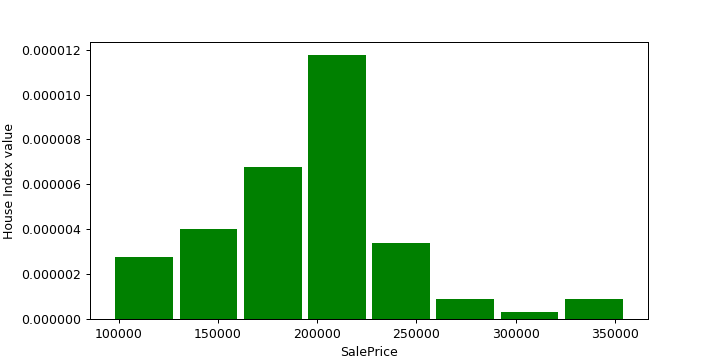

Text(0.5, 0, 'SalePrice')

In [140]:
#Use Histogram to better understand the result
fig1, axes1 = plt.subplots(1, 1, figsize=(8, 4), sharey=True)
ax1_0= axes1
ax1_0.hist(x=df_Sale_Price_Predict['SalePrice'], density=True, bins=8, rwidth=0.9,color='g')
ax1_0.set_ylabel('House Index value')
ax1_0.set_xlabel('SalePrice')

In [141]:
#Write to CSV file
df_Sale_Price_Predict.to_csv("Sale_Price.csv", index=True)

In [142]:
#Read the results 
saleprice=pd.read_csv('Sale_Price.csv')

In [143]:
# Sale price predicted are displayed
saleprice

,PID,SalePrice
0,528445060,247869.581450
1,528456160,192150.986650
2,528458070,193619.830099
3,906380190,205226.837619
4,906385010,192335.835372
5,906385020,193050.841065
6,528235010,194848.393824
7,528235090,217121.184659
8,528240150,117354.391539
9,528250020,206485.408308
